# Chunwei_Tung_Model

# Introduction

In this model, we discuss about "McCann, K., Hastings, A. & Huxel, G. Weak trophic interactions and the balance of nature. Nature 395, 794–798 (1998)." In this article, they analysis inﬂuence of interaction strength on food-web dynamics, and indicate that **weak to intermediate strength links are important in stability**. Weak links act to dampen oscillations between consumers and resources and let population further away from zero.

In the following model, I will investigate one model to predict the omnivory mechanism. Here we assume there are one resource, one consumer and one predator, the their relationship in according to the following figure (left figure).
![title](pic.jpg)

As the figure above, $\Omega$ represent strength of the omnivory interation. We can realize that when $\Omega$ is 0, the mechanism will be competition relation (middle figure), but when $\Omega$ become larger and equal to 1 ( $\Omega \leq 1$, explain below), the mechanism turn to food chain (right figure).

And Here is what we want to investigate, we had already known that **a food chain will lead chaos**, and we want to check whether there are some solution for omnivory does not collapse and get a coexistence in three species. **In other words, is it important for weak link in omnivory?**

In my model, the model is based on several assumptions:
* All species follow the type II functional responses.
* Measure of interaction strength that is based upon empirical estimates of per capita interaction strength.
* Communities ccan display nonequilibrium dynamics.
* Construct complexity as simple food webs in a manner consistent with patterns found in nature.
* In the absence of others, the resource $R$ population grows according to the logistic growth model until their carrying capacity $K$ is reached.

As I built my model, there are three species: top predator $P$, with parameter $\Omega$ controls the top predators preference for either resource $R$, or consumer $C$, and set one equation  for population density.

$$
\begin{aligned}
\frac{dR}{dt} &= R\cdot (1 - \frac{R}{k}) - \frac{x_c\cdot y_c\cdot C\cdot R}{R+R_0} - \frac{(1 - \Omega)\cdot x_p\cdot y_p\cdot P\cdot R}{\Omega\cdot C+(1-\Omega)\cdot R+C_0+R_{02}} \\
\frac{dC}{dt} &= -x_c\cdot C\cdot (1 - \frac{y_c\cdot R}{R+R_0}) - \frac{\Omega\cdot x_p\cdot y_p\cdot P\cdot C}{\Omega\cdot C+(1 - \Omega)\cdot R + C_0}\\
\frac{dP}{dt} &= -x_p\cdot P + \frac{x_p\cdot P\cdot \Omega\cdot y_p\cdot C}{\Omega\cdot C+C_0+(1-\Omega)\cdot R)} + \frac{x_p\cdot P\cdot (1-\Omega)\cdot y_p\cdot R}{\Omega\cdot C+(1-\Omega)\cdot R+R_{02}}
\end{aligned}
$$

This model is a little complicated and contain several parameters:
* $\Omega$: the strength of omnivory
* $R, C, P$: resource density, consumer density, predator density
* $k$: the resource carrying capacity
* $x_c, x_p$: the mass-speciﬁc metabolic rate of the consumner $C$, and predator $P$, measured relative to the production-to-biomass ratio of resource $R$
* $y_c, y_p$: measure of ingestion rate per unit metabolic rate of  the consumner $C$, and predator $P$
* $R_0, C_0$: the half-saturation densities of the resource $R$, and consumer $C$
* $R_{02}$: the new half saturation density of the resource $R$, now being consumed by the predator $P$

Apparently, $\Omega$ represent a fraction indicating the level of interspecific interaction bewteen predator and consumner, thus $\Omega$ must be located in range of 0 to 1: $\Omega = 0$ means no interaction bewteen predator $P$ and consumer $C$, and $\Omega = 1$ means predator $P$ feed only on this consumer $C$.

**In this model, we focus on the change the values of $\Omega$, that will effect the omnivory system.**  



To reproduce some of the key results we first need to load some more packages than in the previous chapters:

In [1]:
import numpy as np
from scipy import integrate as integ
from scipy import signal as signal        # this package will be used to find local extrema
from mpl_toolkits.mplot3d import Axes3D   # this package will be used to create figures in 3D
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In a next step, we define our dynamical system of omnivory:

In [2]:
def omnivory(x,t):
    
    R = x[0]  # resource
    C = x[1]  # comsumer
    P = x[2]  # predator
     
    if P <= 0:
        P = 0
    if R <= 0:
        R = 0
    if C <= 0:
        C = 0
    
    r_dot = R*(1 - R/k) - (x_c*y_c*C*R)/(R+R_0) - ((1 - omega)*x_p*y_p*P*R)/(omega*C+C_0+(1-omega)*R+R_0P)
    c_dot = -x_c*C*(1 - (y_c*R)/(R+R_0)) - (omega*x_p*y_p*P*C)/(omega*C+C_0+(1 - omega)*R)
    p_dot = -x_p*P + (x_p*P*omega*y_p*C/(omega*C+C_0+(1-omega)*R)) + (x_p*P*(1-omega)*y_p*R)/(omega*C+(1-omega)*R+R_0P)
    # -x_p*P + (x_p*P*omega*y_p*C/(omega*C+C_0+(1-omega)*R)) + (x_p*P*(1-omega)*y_p*R)/(omega*C+(1-omega)*R+R_0P)
    # -x_p*P*(1 - (omega*y_p*C+(1-omega)*y_p*R)/(omega*C+C_0+(1-omega)*R+R_0P))
    
    return [r_dot, c_dot, p_dot]

After definition of model, we need to define values of our parameters, McCann et al.(1998) said that we can began with parameters for a biologically plausible example of persistent chaotic dynamics for a three-species food chain:

$k = 1, x_c = 0.4, x_p 0.08, y_c = 2.009, y_p = 5, R_0 = 0.16129, C_0 = 0.5,; R_{02} = 0.5, \Omega = 1$

Also define our time period and initial value of density.

In [19]:
# time
t = np.arange(0,1000,0.1)

#set parameters

# carrying capacity
k = 1

# metabolic rate
x_c = 0.4
x_p = 0.08

# ingestion rate
y_c = 2.009
y_p = 5.0

# half-saturation densities of the resource
R_0 = 0.16129
C_0 = 0.5
R_0P = 0.5


# initial value
omega = 1.0
x0 = [1,0.6,0.4] 


# Time serious with population density

First, we want to observe **What impact will the adjustment of factor $\Omega$ have on the omnivory system?**

Hence, we plot the time serious with different values of $\Omega$ for three species:
* At $\Omega$ is close to 0, we expect some situation that one of comsumer $C$ and predator $P$ will **extinct** because of competition.
* At $\Omega$ is close to 1, the omnivory system will lead **chaos**
* At other values of $\Omega$, we want to obseve what will happened.

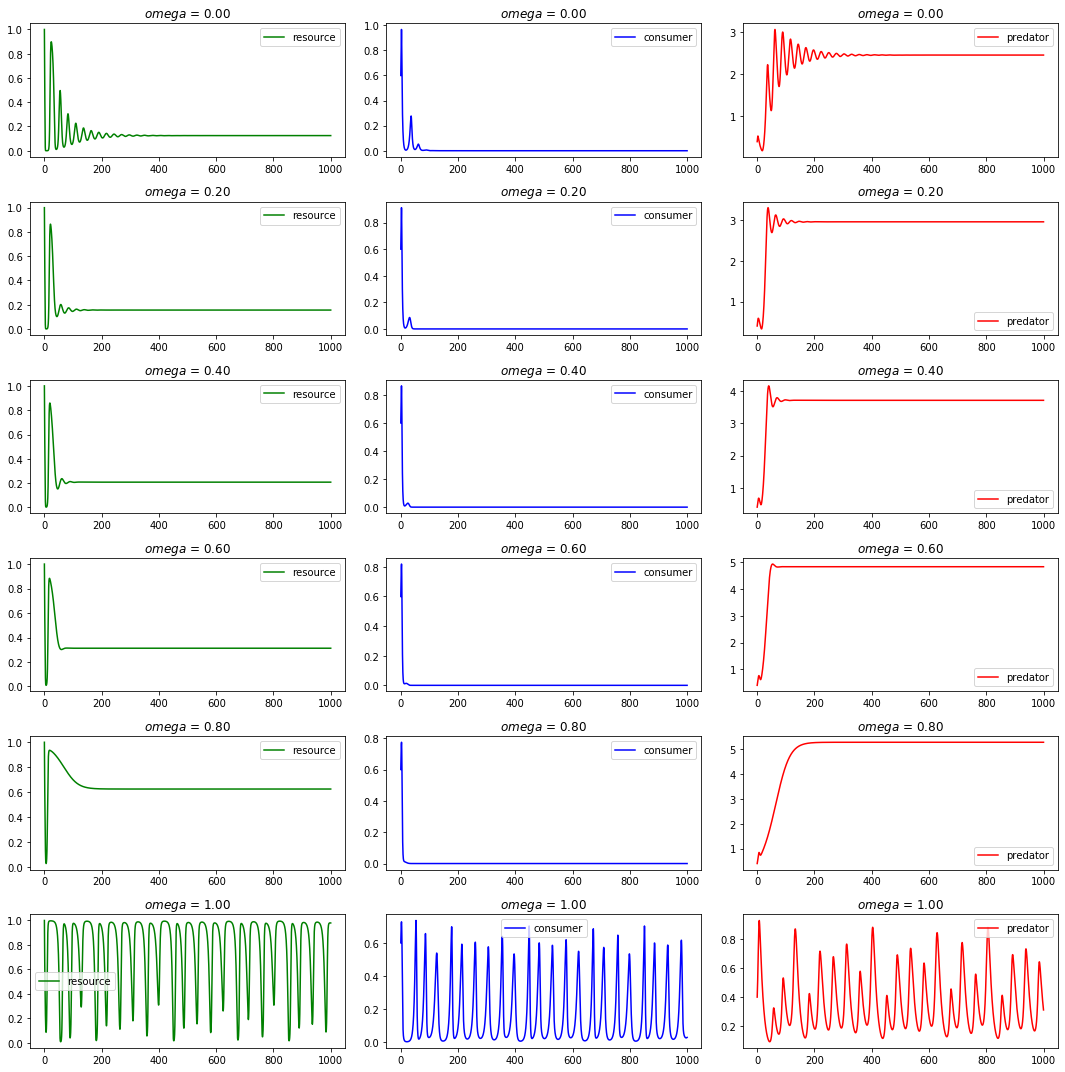

In [4]:
omega_values = [0, 0.2, 0.4, 0.6, 0.8, 1]
size = len(omega_values)
i = 0
plt.close()
plt.figure(figsize=(15,15))

for omega in omega_values:
    x = integ.odeint(omnivory, x0, t)
    
    R = x[:,0]  # 
    C = x[:,1]  # 
    P = x[:,2]  # 
    
    plt.subplot2grid((size,3), (i, 0))
    plt.plot(t,R,'g-',label = 'resource')
    plt.title(r'$omega$ = %.2f' %(omega))
    plt.legend()
    
    plt.subplot2grid((size,3), (i, 1))
    plt.plot(t,C,'b-',label = 'consumer')
    plt.title(r'$omega$ = %.2f' %(omega))
    plt.legend()
    
    plt.subplot2grid((size,3), (i, 2))
    plt.plot(t,P,'r-',label = 'predator')
    plt.title(r'$omega$ = %.2f' %(omega))
    plt.legend()
    
    i += 1
    
plt.tight_layout() 

As we can see, the time series become more and more complex with increasing values of $\Omega$:

As we expected, the system show competition and food-chain mechanism.
* At $\Omega = 0$: we can observe consumer go extinct, it is no too surprise because consumer get high pressure from predator: not only suffer the pressure of attack from predator, but also get the pressure of decrease the amount of resource.
* At $\Omega = 0.2, 0,4, 0.6$ and $0.8$: we can still observe that consumer become extinct and resource and predator get coexistence. Here one thing is interesting, while the valus of $\Omega$ increase, the population density of predator become higher, thus increase the weak link raises the floor of the attractor. Meanwhile, the phenomenon of stable spirale become smaller, which means the complex part of eigenvalue become zero, show that the system reach the fixed point faster and more stable.
* At $\Omega = 1$: we can ovserve the omnivory system bacome chaos and also match our expectation.

From here, we can see that while we increase the value of $\Omega$, although we still cannot reach the coexistence for three species, the stability of omnivory system become stable: **the weak link indeed increase the stability of omnivory system.**
Now, we are interesting what is happened in $0.8 \leq \Omega \leq 1$, so we plot time serious again with value of $\Omega$ focus on [0.8, 1].

p.s I am very curious about if I change the initial population density of consumer to high value, what will change in the system. And the answer is that consumer still go extinct quickly and nothing change.

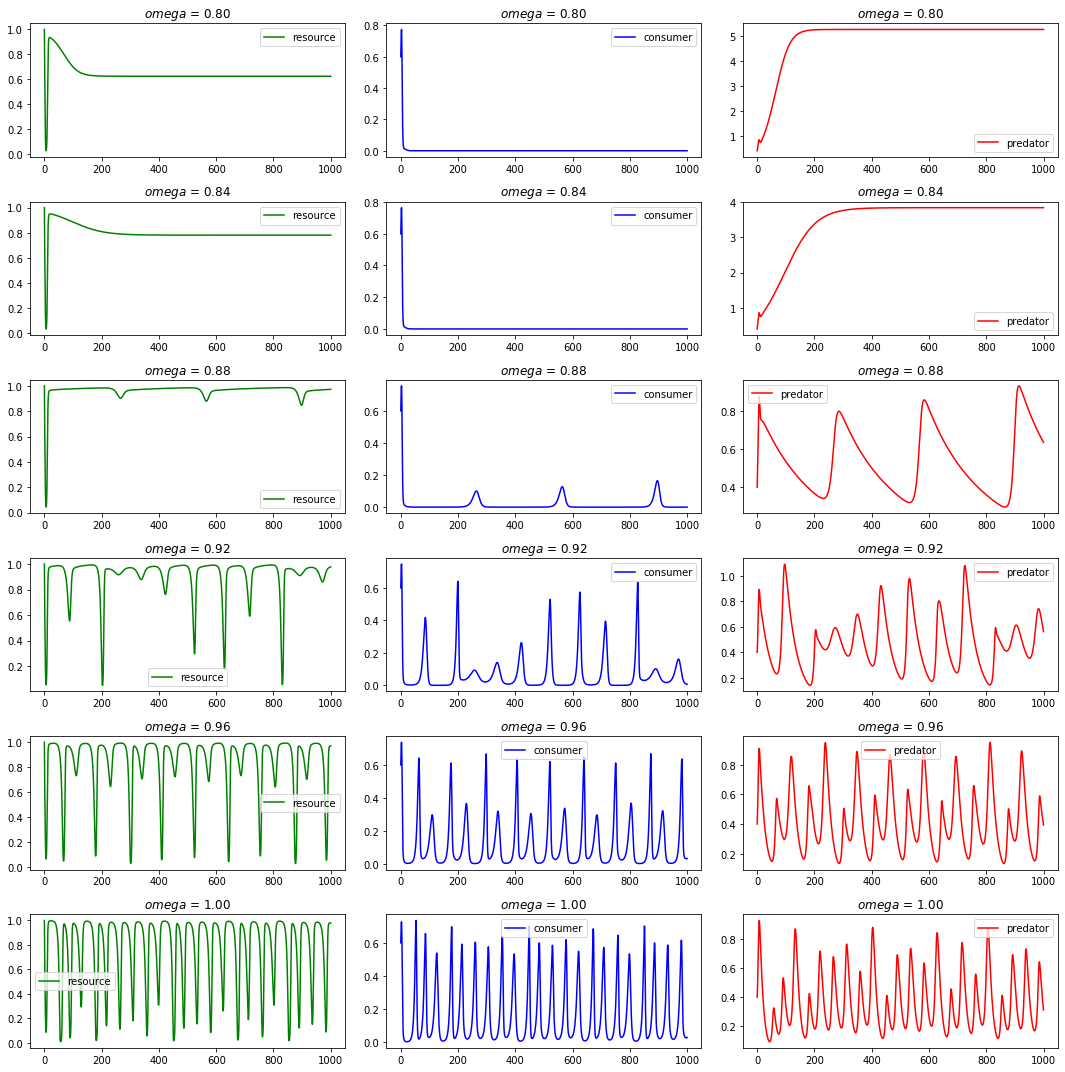

In [5]:
omega_values = np.arange(0.8,1.01,0.04)
size = len(omega_values)
i = 0
plt.close()
plt.figure(figsize=(15,15))

for omega in omega_values:
    x = integ.odeint(omnivory, x0, t)
    
    R = x[:,0]  # 
    C = x[:,1]  # 
    P = x[:,2]  # 
    
    plt.subplot2grid((size,3), (i, 0))
    plt.plot(t,R,'g-',label = 'resource')
    plt.title(r'$omega$ = %.2f' %(omega))
    plt.legend()
    
    plt.subplot2grid((size,3), (i, 1))
    plt.plot(t,C,'b-',label = 'consumer')
    plt.title(r'$omega$ = %.2f' %(omega))
    plt.legend()
    
    plt.subplot2grid((size,3), (i, 2))
    plt.plot(t,P,'r-',label = 'predator')
    plt.title(r'$omega$ = %.2f' %(omega))
    plt.legend()
    
    i += 1
    
plt.tight_layout() 

Here we plot the time series with $\Omega$ from 0.8 to 1.0:
* At $\Omega = 0.8, 0.84$: the consumer go extinct again, and resource and predator get coexistence, but interesting, the population density of predator in stable state decrease a little.
* At $\Omega = 0.88$: consumer start to have some oscillations, show that the omnivory start to become less stable.
* At $\Omega = 0.92, 0.96$ and $1.0$: we observe more complicated oscillations containing secondary, third minima and maxima. This irregularity of the time series is **a typical for chaotic dynamics**.

After close looking at the value of $\Omega$, we realize that it seems no possible solution for coexistence with three species, and omnivory become less stable as $\Omega$ close to 1, and finally get a chaotic dynamics.

**SUMMARY**

Through observing the time series with different values of $\Omega$, we can get some conclusions:
* When $\Omega$ is small, the omnivory become competition system, and consumer will go to extinct.
* As value of $\Omega$ become large, the consumer still become extinct, and resource and predator coexist. **However, the fixed point is change from stable spirale to stable point: The whole omnivory become stable with larger value of $\Omega$.**
* When $\Omega$ is close to 1, the omnivory system become less stable again and finally lead to chaos.

# Phase Space 

In this part, we want to analysis the phase space, after the observing the time series figure, we can get shorten conclusion, but I am also interesting in some part of them:
* What is the situation bewteen $\Omega$ is $0.84$ to $0.88$? it seems we still have some little possible for coexistence of omnivory system.
* How we can observe with phase space with two and three species? 
* Can we find where is the bifurcation?

Hence, we do the macro and micro phase space with different values of $\Omega$

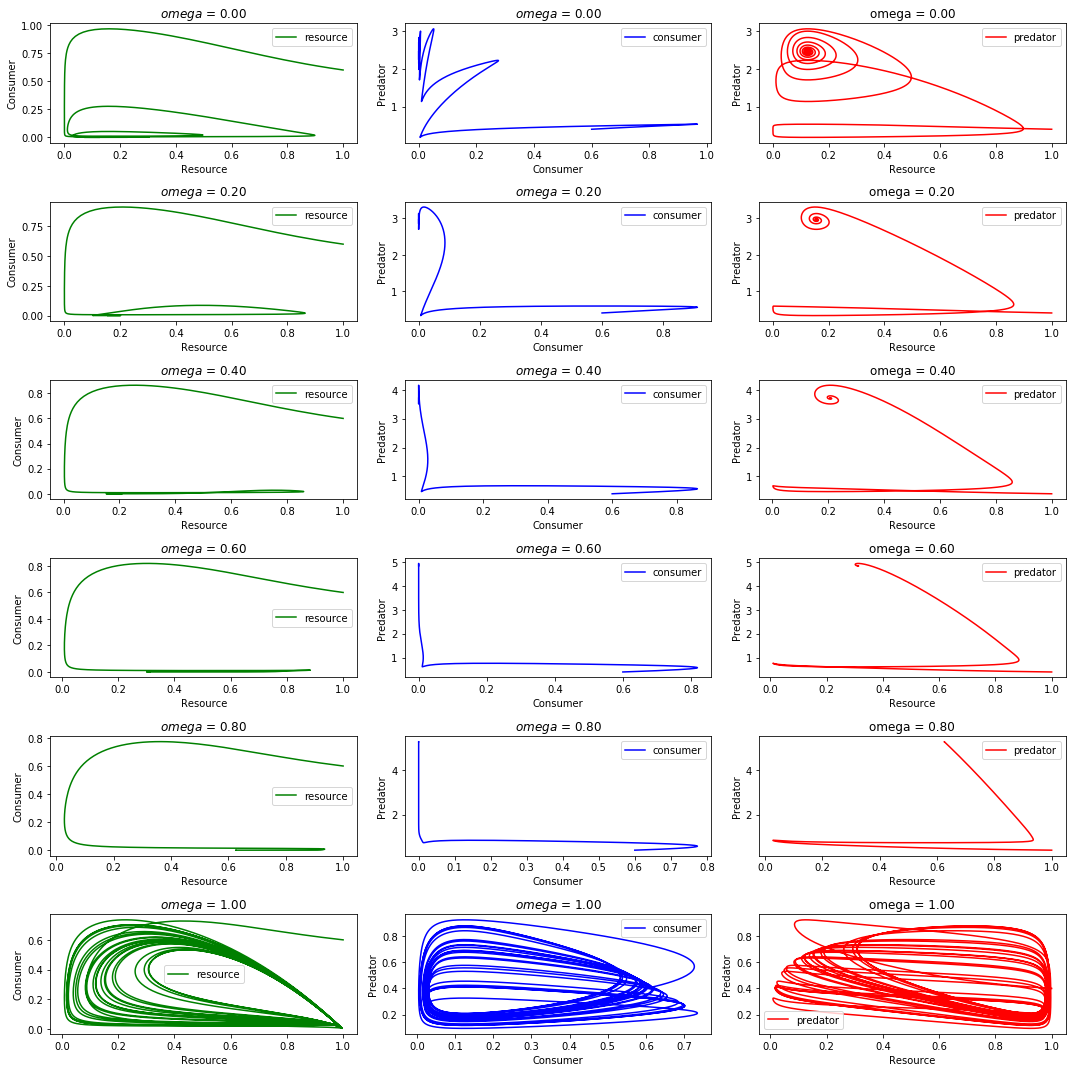

In [6]:
omega_values = [0, 0.2, 0.4, 0.6, 0.8, 1]
size = len(omega_values)
i = 0
plt.close()
plt.figure(figsize=(15,15))
for omega in omega_values:
    x = integ.odeint(omnivory, x0, t)
    
    R = x[:,0]  # 
    C = x[:,1]  # 
    P = x[:,2]  # 
    
    plt.subplot2grid((size,3), (i, 0))
    plt.plot(R,C,'g-',label = 'resource')
    plt.title(r'$omega$ = %.2f' %(omega))
    plt.xlabel('Resource')
    plt.ylabel('Consumer')
    plt.legend()
    
    plt.subplot2grid((size,3), (i, 1))
    plt.plot(C,P,'b-',label = 'consumer')
    plt.title(r'$omega$ = %.2f' %(omega))
    plt.xlabel('Consumer')
    plt.ylabel('Predator')
    plt.legend()
    
    plt.subplot2grid((size,3), (i, 2))
    plt.plot(R,P,'r-',label = 'predator')
    plt.title(r'omega = %.2f' %(omega))
    plt.xlabel('Resource')
    plt.ylabel('Predator')
    plt.legend()
    
    i += 1
    
plt.tight_layout() 

In the phase space, we confirm our argument again:

When $\Omega = 0$:
* Resource decrease significantly first because the pressure from both consumer and predator. 
* Once resource decrease, the consumer decrease dramatically and go to extinct. 
* After the extinction of consumer, the resource and predator get coexistence fixed point with a stable spirale, meaning that the resource and predator population densities approach it with dampened oscillations.

When $0.2 \leq\Omega\leq 0.8$:
* Resource decrease significantly first because the pressure from both consumer and predator.
* Once resource decrease, the consumer decrease dramatically and go to extinct. 
* After the extinction of consumer, the resource and predator get coexistence fixed point. **However, the stable spirale become smaller and turn to a stable fixed point.**

When $\Omega = 1$:
* Every phase space show its trajectory stay aperiodic and seems never repeat itself. 

Again, I want to know what happen in omnivory system before it go to chaos. Therefore, we do the same thing as above, but change the values of $\Omega$ in range from 0.8 to 1.0|

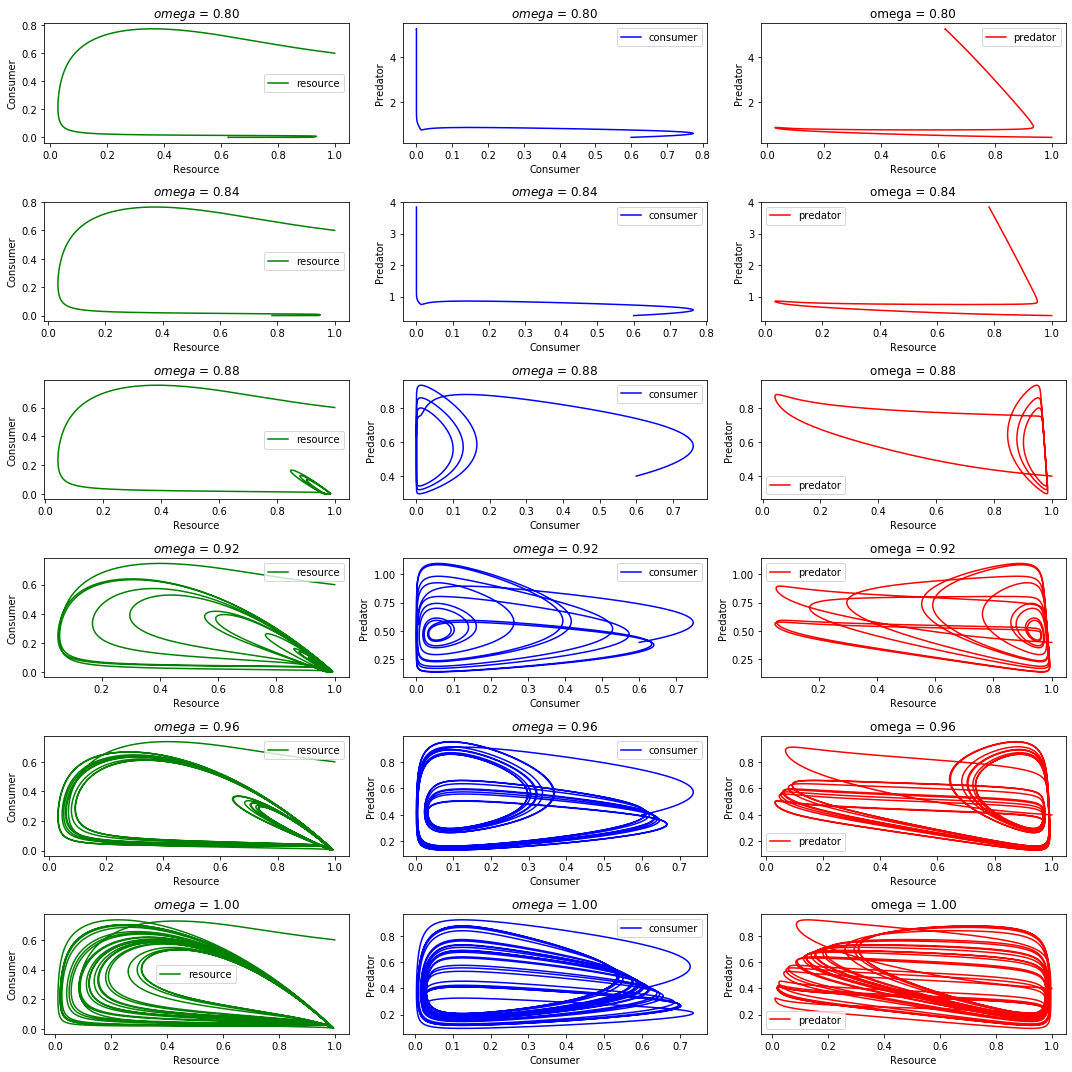

In [7]:
omega_values = np.arange(0.8,1.01,0.04)
size = len(omega_values)
i = 0
plt.close()
plt.figure(figsize=(15,15))
for omega in omega_values:
    x = integ.odeint(omnivory, x0, t)
    
    R = x[:,0]  # 
    C = x[:,1]  # 
    P = x[:,2]  # 
    
    plt.subplot2grid((size,3), (i, 0))
    plt.plot(R,C,'g-',label = 'resource')
    plt.title(r'$omega$ = %.2f' %(omega))
    plt.xlabel('Resource')
    plt.ylabel('Consumer')
    plt.legend()
    
    plt.subplot2grid((size,3), (i, 1))
    plt.plot(C,P,'b-',label = 'consumer')
    plt.title(r'$omega$ = %.2f' %(omega))
    plt.xlabel('Consumer')
    plt.ylabel('Predator')
    plt.legend()
    
    plt.subplot2grid((size,3), (i, 2))
    plt.plot(R,P,'r-',label = 'predator')
    plt.title(r'omega = %.2f' %(omega))
    plt.xlabel('Resource')
    plt.ylabel('Predator')
    plt.legend()
    
    i += 1
    
plt.tight_layout() 

When $\Omega = 0.84$, the resource and predator still coexist and seems the omnivory system is stable, but when $\Omega = 0.88$, the system start to get complex oscillations.

**Hence, I guess it must have a bifurcation bewteen 0.84 and 0.88**

Now let us have a look for 3D figure, also extend the run time to see whether it can show some other information or adjustment.

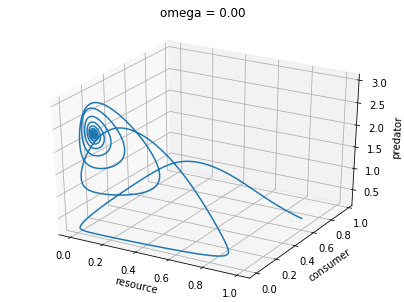

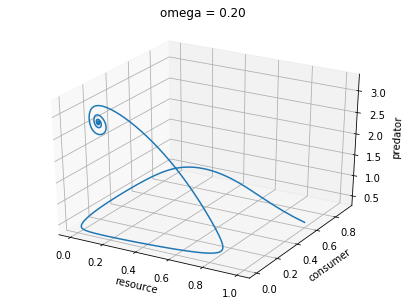

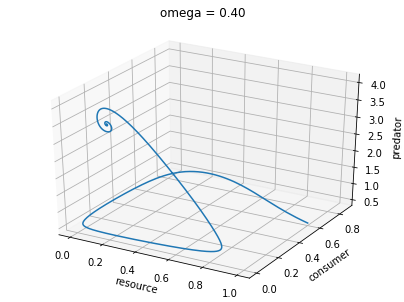

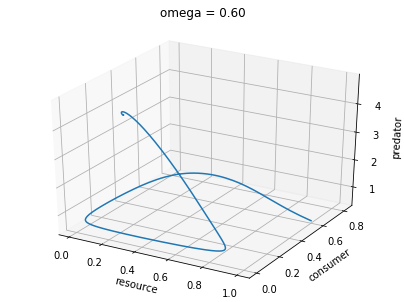

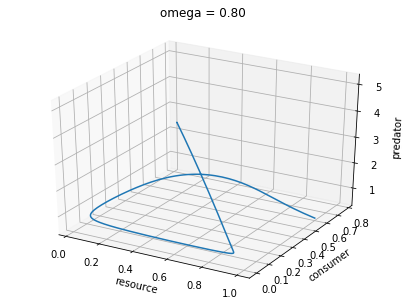

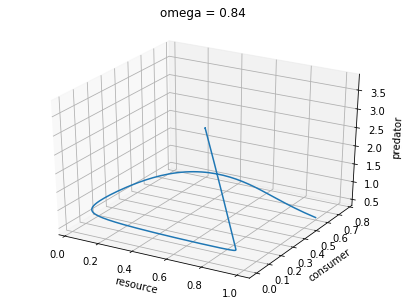

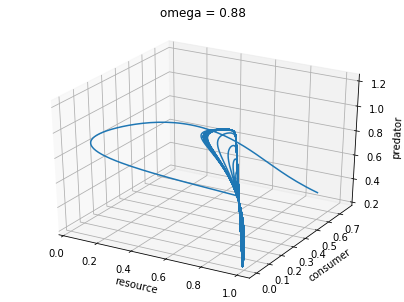

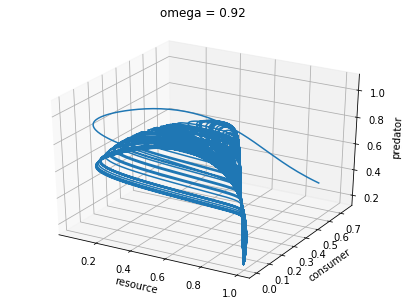

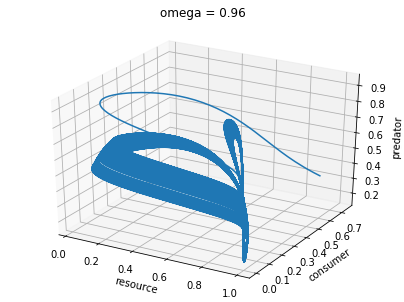

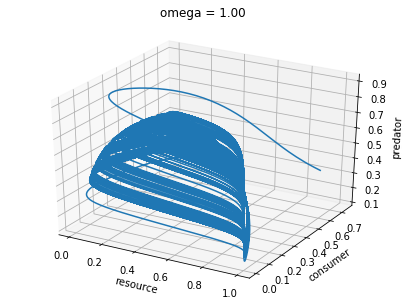

In [8]:
tend = 10000                # Long run time needed to get a nice figure
tstep = 0.1
t = np.arange(0,tend,tstep)

omega_values = [0, 0.2, 0.4, 0.6, 0.8, 0.84, 0.88, 0.92, 0.96, 1]
size = len(omega_values)
i = 0                  
plt.close()

for omega in omega_values:
    x = integ.odeint(omnivory, x0, t)


    B = x[-100000:,0]            # We are only interested in the stationary part of the time series. 
    I = x[-100000:,1]            # So we extract only the last 20000 time steps (of 100000)
    T = x[-100000:,2]            # 

    fig = plt.figure(figsize = (7,5))
    ax = fig.gca(projection = '3d')
    plt.plot(B,I,T, markersize=3)
    ax.title.set_text('omega = %.2f' %(omega))
    ax.set_xlabel('resource')
    ax.set_ylabel('consumer')
    ax.set_zlabel('predator');

As the run time become longer, we can still observe resource and predator coexist, as $\Omega$ become larger, the fixed point turn from stable spirale to stable. And when $\Omega$ is close to 1, there is **one strange attractor**, indicating oscillations between resource and consumer species that become more and more dampend by the recovering top predator population, the omnivory turn to chaotic dynamics.

**SUMMARY**

In the step of phase space, we confirm our hypothesis in the part of time serious.

Therefore, we guess there are two bifurcation:
* One happens when the coexistence fixed point bewteen resource and predator turn from stable spiral to stable
* Another appear when the coexistence fixed ponit become unstable and lead to chaos.

# Bifurcation

We have seen in the previous part that the system goes through a series of transitions from stable coexistence to chaotic behavior. But we still have **some question that if there exist oscillations (limit cycle) in all species**.

Thus, we decide to create a bifurcation diagram and check how many bifurcation exist in this model.

In [9]:
def find_extrema(x,n):
    """ returns an array with n extremal values of x"""
    
    min_index = signal.argrelmin(x)[0]         # create array with indices of local minima of x
    max_index = signal.argrelmax(x)[0]         # create array with indices of local maxima of x
    
    ext_index = np.append(min_index,max_index) # array with indices of local extrema in x
    ext_index = np.sort(ext_index)             # sort array (alternating minima and maxima)
    extrema = x[ext_index]                     # array with the actual values of the extrema
    
       
    if len(extrema) == 0:                      # if all values in x are the same and no extremum is found:
        extrema = np.append(extrema,x[-1])     #   return last value of x in this case
    while len(extrema) < n:                    # if less than n extrema have been found:
        extrema = np.append(extrema,extrema[0])#   repeat last extremum until array has n elements
    while len(extrema) > n:                    # if more than n extrema have been found:
        extrema = np.delete(extrema,-1)        #   delete elements until array has n elements

        
    return extrema

In [10]:
x0 = [1,1,1]                     # initial value
tend = 10000                        # we need long time series!
tstep = 0.1                         # smaller steps increase accuracy
t = np.arange(0,tend,tstep)

omega_values = np.arange(0.0,1.0,0.0005)    # valus for the bifurcation parameter b1   
N_extr = 100                       # Number of maxima and minima we want to have per b1 value

B_extr = []                        # empty lists to store the maxima and minima of the biomass densities 
I_extr = []                        
T_extr = []

for omega in omega_values:
    

    x = integ.odeint(omnivory, x0, t)
    B_stat = x[-5001:,0]           # read out the second half of the time series (forget transient dynamics)
    I_stat = x[-5001:,1]           
    T_stat = x[-5001:,2]
#     print(max(B_stat), min(B_stat))
    
    x0 = x[-1]                      # use last values as new intial values
    
    B_extr.append(find_extrema(B_stat,N_extr))     # find maxima and minima
    I_extr.append(find_extrema(I_stat,N_extr))
    T_extr.append(find_extrema(T_stat,N_extr))

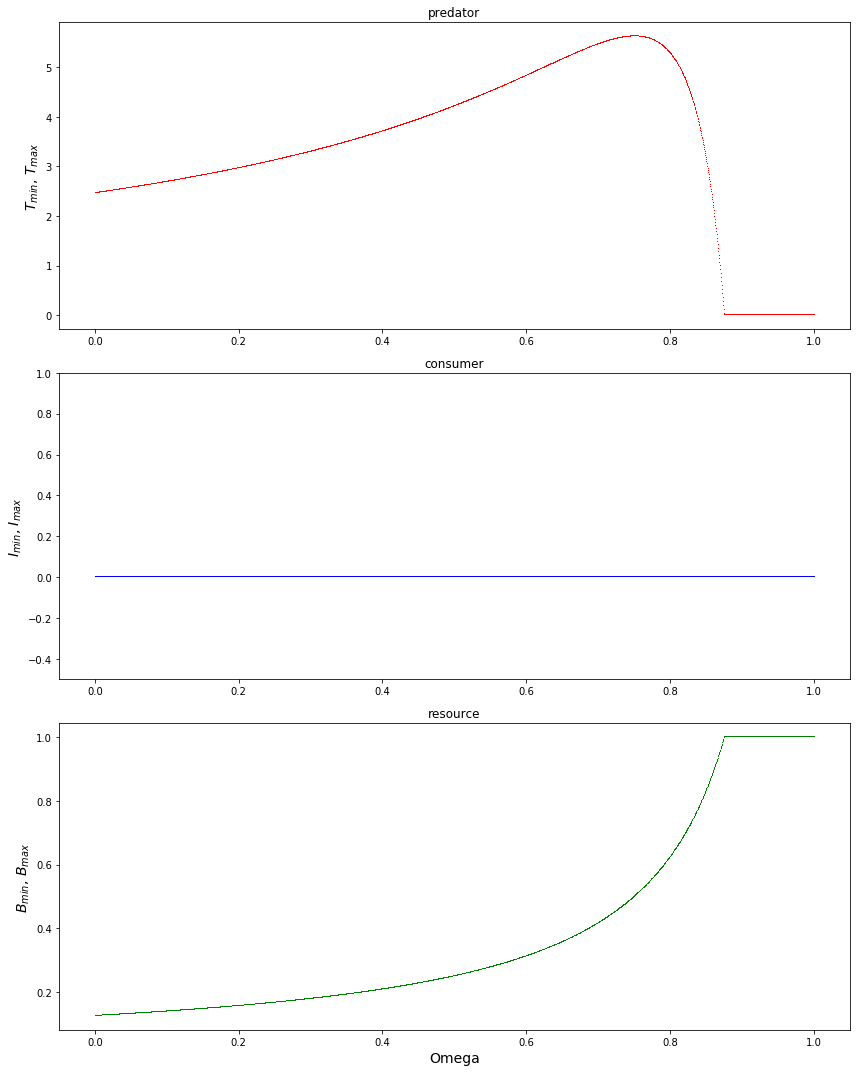

In [11]:

plt.figure(figsize=(12,15))

plt.subplot2grid((3,1), (2, 0))
plt.plot(omega_values,B_extr, 'g,')
plt.title('resource')
plt.ylabel(R'$B_{min}$, $B_{max}$',fontsize=14 )
plt.xlabel(r'Omega',fontsize=14)

plt.subplot2grid((3,1), (1, 0))
plt.plot(omega_values,I_extr,'b,')
plt.title(u'consumer')
plt.ylim(-0.5,1)
plt.ylabel(R'$I_{min}$, $I_{max}$',fontsize=14)

plt.subplot2grid((3,1), (0, 0))
plt.plot(omega_values,T_extr,'r,')
plt.title(u'predator')
plt.ylabel(R'$T_{min}$, $T_{max}$',fontsize=14)

plt.tight_layout()

We get stuck after we plot the bifurcation graph, it seems something strange:
* It really seems something happens at $\Omega \approx 0.9$, however, we didn't see any chaotic dynamics
* It seems no bifurcation when the coexistence turn from stable spiral to stable fixed point

It really confuse to me, I even checked the maxima and minimavalue of population density, but cannot find any problem in code or figure. Thus, it is totally conflict to what we observe in previous part. Here is only one **transcritica bifurcation** at $\Omega \approx 0.9$, which make predator extinct and the resource grow to its carry capacity.

And I think the reason of extinction of predator is due to following condition:
* $\Omega$ become larger, the dependence of predator on resource become small, but because consumer has already extincted, so predator cannot keep its population density and decrease, as extinct as soon as the population density falls below a certain threshold. Meanwhile, without any consumer and predator, the resource get no pressure and grow to its carry capacity.

But even we successfully annotate this bifurcation, we still cannot explain why it shows up a chaos in previous part but nothing here. 

Hence, we make **a hypothesis that because the population of predator decrease so dramatical, that predator extinct before reaching another bifurcation.** It seem make sence because once two of them get extinction, there is no interaction anymore, so even there is other bifurcation, we cannot find it.

And the reason cause the predator extinct is in our code, we set the initial value of population density is the last value of last $\Omega$, so if we want to check whether our hypothesis is correct, **we set the fixed value of initail population density for any species.**

In [12]:
x0 = [1,1,1]                     # initial value
tend = 10000                        # we need long time series!
tstep = 0.1                         # smaller steps increase accuracy
t = np.arange(0,tend,tstep)

omega_values = np.arange(0.0,1.0,0.0005)    # valus for the bifurcation parameter b1   
N_extr = 100                       # Number of maxima and minima we want to have per b1 value

B_extr = []                        # empty lists to store the maxima and minima of the biomass densities 
I_extr = []                        
T_extr = []

for omega in omega_values:
    

    x = integ.odeint(omnivory, x0, t)
    B_stat = x[-5001:,0]           # read out the second half of the time series (forget transient dynamics)
    I_stat = x[-5001:,1]           
    T_stat = x[-5001:,2]
#     print(max(B_stat), min(B_stat))
    
    x0 = [1,1,1]                      # use constant value
    
    B_extr.append(find_extrema(B_stat,N_extr))     # find maxima and minima
    I_extr.append(find_extrema(I_stat,N_extr))
    T_extr.append(find_extrema(T_stat,N_extr))

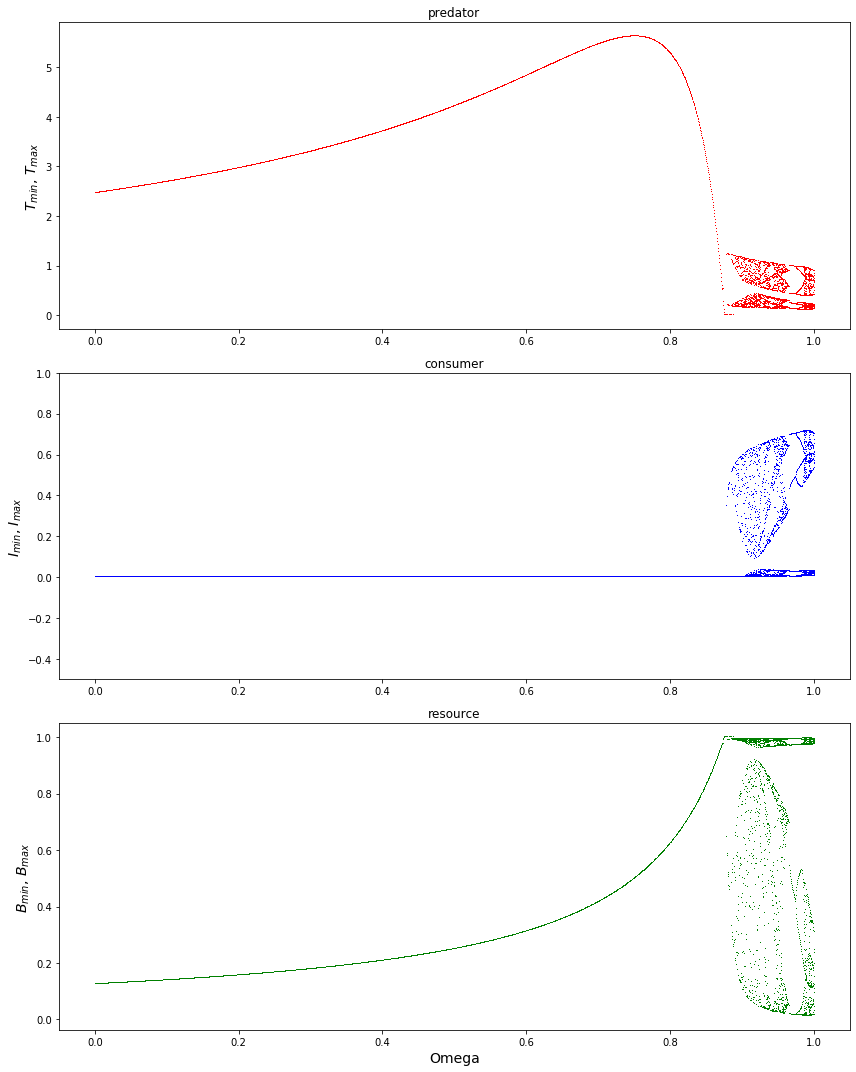

In [13]:

plt.figure(figsize=(12,15))

plt.subplot2grid((3,1), (2, 0))
plt.plot(omega_values,B_extr, 'g,')
plt.title('resource')
plt.ylabel(R'$B_{min}$, $B_{max}$',fontsize=14 )
plt.xlabel(r'Omega',fontsize=14)

plt.subplot2grid((3,1), (1, 0))
plt.plot(omega_values,I_extr,'b,')
plt.title(u'consumer')
plt.ylim(-0.5,1)
plt.ylabel(R'$I_{min}$, $I_{max}$',fontsize=14)

plt.subplot2grid((3,1), (0, 0))
plt.plot(omega_values,T_extr,'r,')
plt.title(u'predator')
plt.ylabel(R'$T_{min}$, $T_{max}$',fontsize=14)

plt.tight_layout()

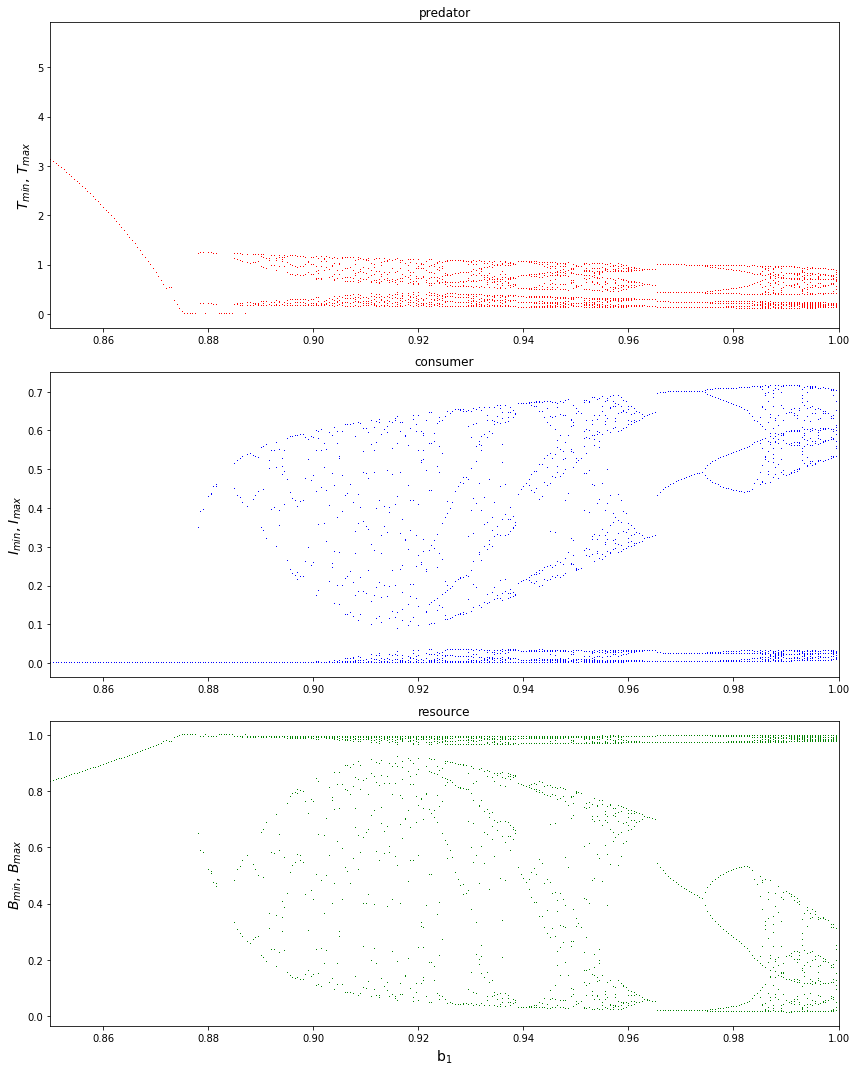

In [14]:
plt.figure(figsize=(12,15))

plt.subplot2grid((3,1), (2, 0))
plt.plot(omega_values,B_extr,'g,')
plt.title('resource')
plt.xlim(0.85, 1)
plt.ylabel(R'$B_{min}$, $B_{max}$',fontsize=14)
plt.xlabel(r'b$_1$',fontsize=14)

plt.subplot2grid((3,1), (1, 0))
plt.plot(omega_values,I_extr,'b,')
plt.xlim(0.85, 1)
plt.title(u'consumer')
plt.ylabel(R'$I_{min}$, $I_{max}$',fontsize=14)

plt.subplot2grid((3,1), (0, 0))
plt.plot(omega_values,T_extr,'r,')
plt.xlim(0.85, 1)
plt.title(u'predator')
plt.ylabel(R'$T_{min}$, $T_{max}$',fontsize=14)

plt.tight_layout()

It seems we successfully overcome the problem that the predator extinct too soon, and show chaos on this bifurcation graph!

Thus, now we can analysis what happened at $\Omega \approx 0.9$, we observe a series of bifurcations :
1. The first one, happening at $\Omega \approx 0.875$ , is a Hopf bifurcation where a stable fixed point becomes unstable and is replaced by a stable limit cycle (guess). One stable population density become two, show that there will exist oscillation, and **this is also what we want to see, there is some probability for three species coexist,** but we still need to check late.
2. The next one, happening at $\Omega \approx 0.882$, is a Torus bifurcation where a stable fixed point (no matter it is one or two dimension) becomes unstable and start to making at least two maxima and two minima for each population density, representing tha the omnivory dinamics start to become chaos. The number of secondary oscillations increases even more between $\Omega \approx 0.85$ and $\Omega \approx 0.96$
3. I am not sure whether it is a bifurcation, but at $\Omega \approx 0.965$, it seems the omnivory dynamics start converge and start to chaos again. Interesting, when we observe the 2D or 3D phase space, we can realize the figure at $\Omega = 0.92$ and $\Omega  = 1$ have different shape compare to the figure at $\Omega = 0.96$, and we actually observe some different in bifurcation graph. Former one seems a typical graph for chaos (same as in chapter 7), but latter one seems not so complex and might become a limit cycle.

Therefore, we can get a little conclusion that the omnivory dynamics system start at a stable fixed point and get chaos when $\Omega$ is close to 1.

Even we prove our hypothesis, but we still get worried that whether we can set the fixed initial value of population density, so we do bifurcation graph again, but this we start from $\Omega = 1$, just want to check whethere it really exist the chaos of this model. 

In [15]:
x0 = [1,1,1]                     # initial value
tend = 10000                        # we need long time series!
tstep = 0.1                         # smaller steps increase accuracy
t = np.arange(0,tend,tstep)

omega_values = np.arange(1.0,0.5,-0.0005)    # valus for the bifurcation parameter b1   
N_extr = 100                       # Number of maxima and minima we want to have per b1 value

B_extr = []                        # empty lists to store the maxima and minima of the biomass densities 
I_extr = []                        
T_extr = []

for omega in omega_values:
    

    x = integ.odeint(omnivory, x0, t)
    B_stat = x[-5001:,0]           # read out the second half of the time series (forget transient dynamics)
    I_stat = x[-5001:,1]           
    T_stat = x[-5001:,2]
#     print(max(B_stat), min(B_stat))
    
    x0 = x[-1]                      # use last values as new intial values
    
    B_extr.append(find_extrema(B_stat,N_extr))     # find maxima and minima
    I_extr.append(find_extrema(I_stat,N_extr))
    T_extr.append(find_extrema(T_stat,N_extr))

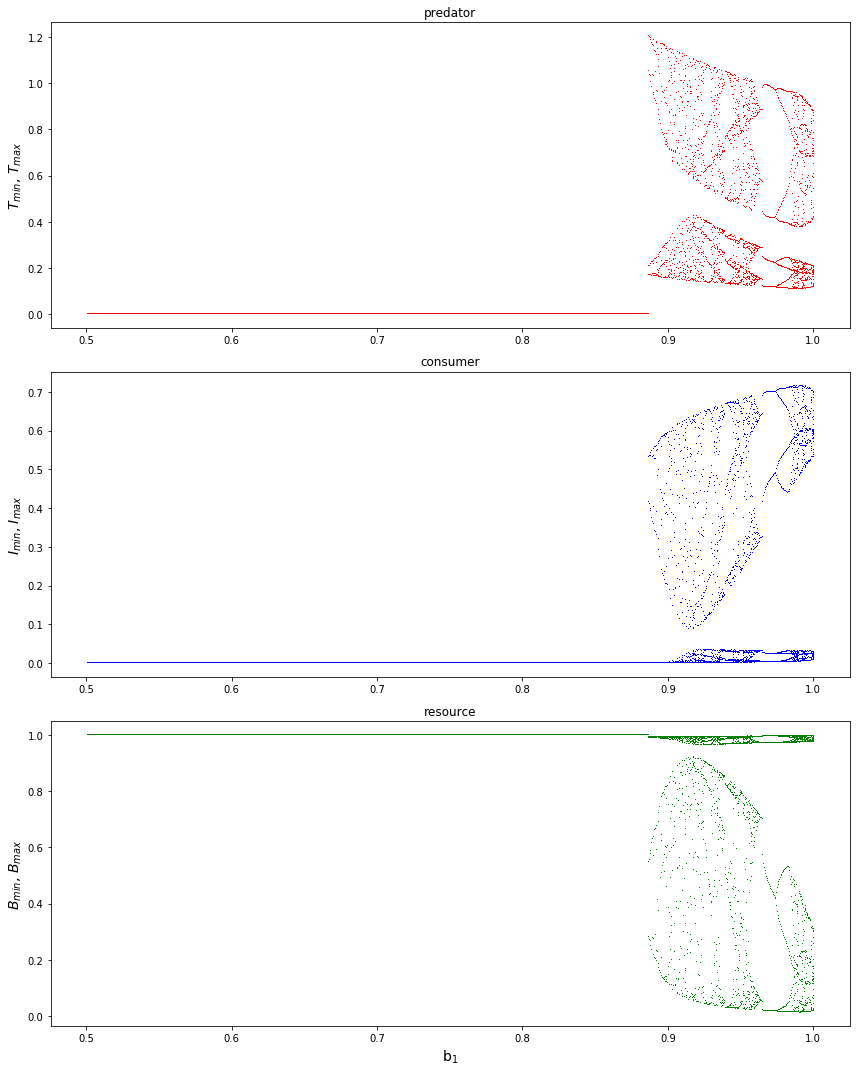

In [16]:
plt.figure(figsize=(12,15))

plt.subplot2grid((3,1), (2, 0))
plt.plot(omega_values,B_extr, 'g,')
plt.title('resource')
plt.ylabel(R'$B_{min}$, $B_{max}$',fontsize=14 )
plt.xlabel(r'b$_1$',fontsize=14)

plt.subplot2grid((3,1), (1, 0))
plt.plot(omega_values,I_extr,'b,')
plt.title(u'consumer')
plt.ylabel(R'$I_{min}$, $I_{max}$',fontsize=14)

plt.subplot2grid((3,1), (0, 0))
plt.plot(omega_values,T_extr,'r,')
plt.title(u'predator')
plt.ylabel(R'$T_{min}$, $T_{max}$',fontsize=14)

plt.tight_layout()

As a result, when we start our bifurcation graph from $\Omega = 1$, it show up the chaos and same as we get in previous part, but cannot get any reason that all species get to extinct when chaos is over.

The only reason I can guess is that after the chaotic dynamics, all species cannot recover and systems collapse.

# Limit Cycle

As we observed at bifurcation part, we want to know whether it exist some value of $\Omega$ that can make omnivory dynamics system become coexistence in all three spices, and we had already realized that the only possible site in located on $\Omega \approx 0.88$ and $\Omega \approx 0.96$.

Hence, we do the phase space again in the micro-investigation around this two certain value of $\Omega$

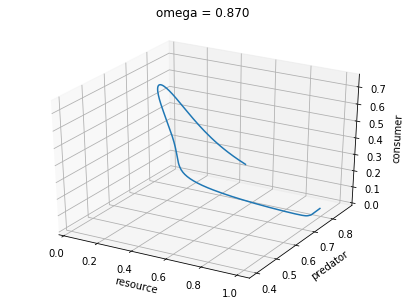

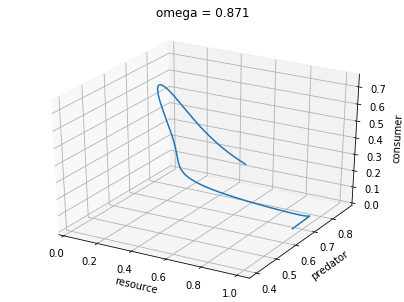

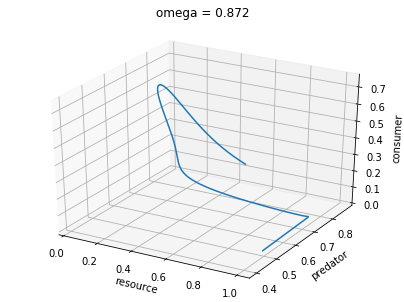

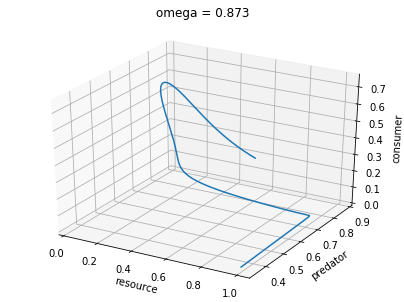

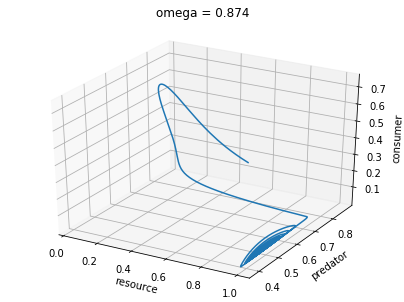

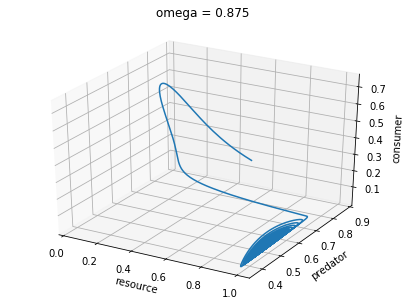

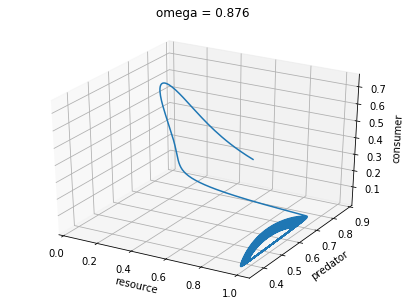

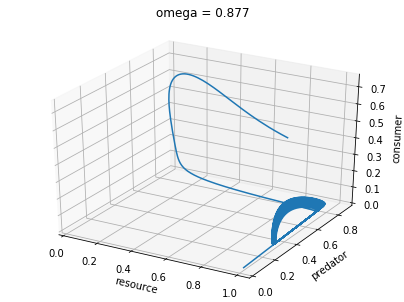

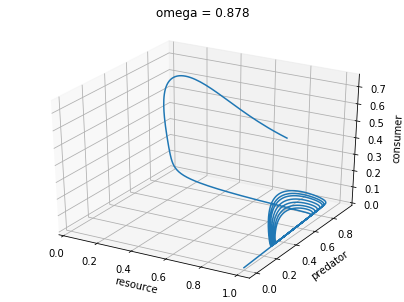

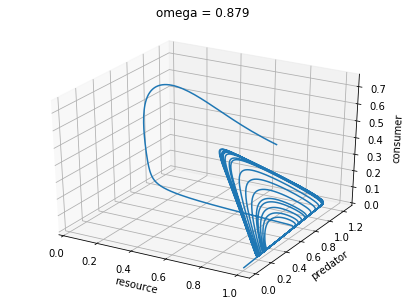

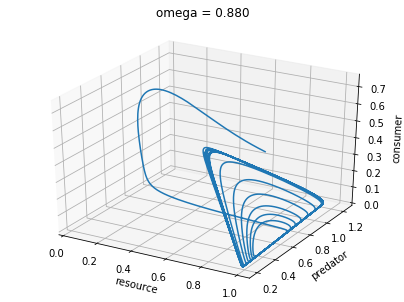

In [20]:
omega_values = np.arange(0.870,0.880,0.001)
tend = 10000                # Long run time needed to get a nice figure
tstep = 0.1
t = np.arange(0,tend,tstep)

size = len(omega_values)
i = 0                  
plt.close()

for omega in omega_values:
    x = integ.odeint(omnivory, x0, t)


    B = x[-100000:,0]            # We are only interested in the stationary part of the time series. 
    I = x[-100000:,1]            # So we extract only the last 20000 time steps (of 100000)
    T = x[-100000:,2]            # 

    fig = plt.figure(figsize = (7,5))
    ax = fig.gca(projection = '3d')
    plt.plot(B, T, I, markersize=3)
    ax.title.set_text('omega = %.3f' %(omega))
    ax.set_xlabel('resource')
    ax.set_ylabel('predator')
    ax.set_zlabel('consumer');

Here we change the label, because when we use original label, we cannot clearly observe the trajactory.

We can observe that at $\Omega = 0.873$, it is a stable fixed point, but at $\Omega = 0.874$, it directly starts to attract by  strange attractor: **It seems no limit cycle in this range values of $\Omega$, but we still have a even close look on it**

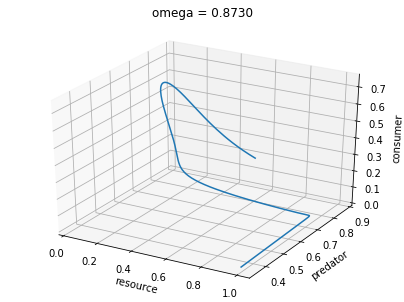

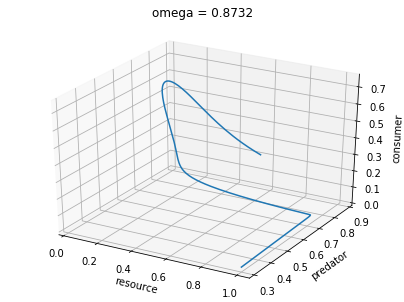

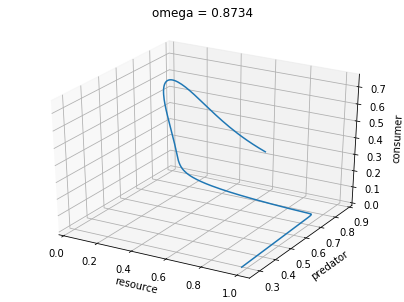

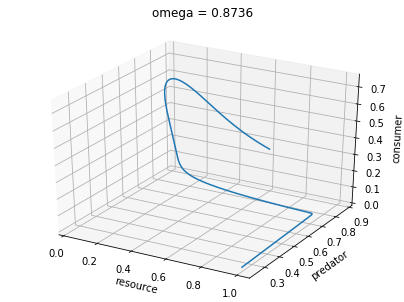

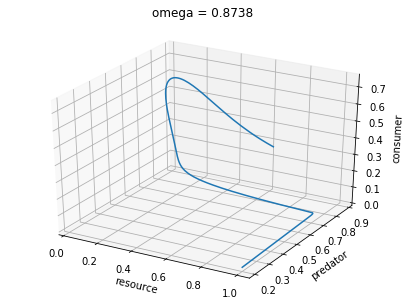

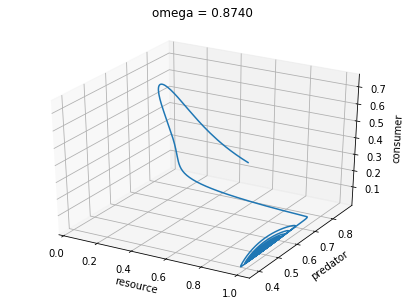

In [21]:
omega_values = np.arange(0.873,0.874,0.0002)
tend = 10000                # Long run time needed to get a nice figure
tstep = 0.1
t = np.arange(0,tend,tstep)

size = len(omega_values)
i = 0                  
plt.close()

for omega in omega_values:
    x = integ.odeint(omnivory, x0, t)


    B = x[-100000:,0]            # We are only interested in the stationary part of the time series. 
    I = x[-100000:,1]            # So we extract only the last 20000 time steps (of 100000)
    T = x[-100000:,2]            # 

    fig = plt.figure(figsize = (7,5))
    ax = fig.gca(projection = '3d')
    plt.plot(B, T, I, markersize=3)
    ax.title.set_text('omega = %.4f' %(omega))
    ax.set_xlabel('resource')
    ax.set_ylabel('predator')
    ax.set_zlabel('consumer');

Just what we observed before, the omnivory dynamics system turn it stability from a stable fixed point **jump** to a strange attractor.
We did the same thing at $\Omega = 0.96$, and only observed that the chaos converge a little and keep start to have a un-repeat oscillation.

**SUMMARY**

After investigate the bifurcation graph, we can get following conclusion:
* This model will get chaotic dynamics when $\Omega$ is close to 1
* Interesting, it seems that the stability of this model start from stable fixed point and jump to chaos, we cannot find any result show that it is one value of $\Omega$ can make the system coexistence for all three species. Even it actually exist, it might be the value under very very percise value (under Third decimal place), and is hard to achieve.

# Discussion

First of all, let us conclude what we get during this whole model: When $\Omega$ is zero, the mechanism will be competition, and consumer and predator will compete the resource, and consumer will be extinction very quickly. As $\Omega$ increase, the consumer still extinct, and the resource and predator get a coexistence state, and seems have a benefit effect on both species. When $\Omega$ keep increasing, the weak link will help whole system become more stable, the coexistence fixed point between resource and predator turned from stable spiral to stable fixed point. However, the dependence of predator on resource also become less and the population of predation start to decrease, and finally get extinction and this system collapse. In other situation, when we start this omnivory dynamics system at $\Omega$ close to 1, it will lead the omnivory dynamics system getting chaos, and make system unstable.

Secondly, in this model, most thing what I observed corroborate my hypothesis, but it still have some part I get stuck:
* In time serious and phase space figures, we can ovserve that the stability start at stable spiral and turned to stable point attractor, **However, we cannot see any bifurcation even we set the constant initial value**. It is also make sence, because what we record is the final stable or unstable statement, and the stable spiral will finally get to  a stable statement. Hence, we cannot see any bifurcation on it. And I also cannot figure out any method to let it show up in bifurcation figure.
* **Why consumer extinct so fast**, for some test, I even get the initial population density of consumer up to 3, but still getting extinct at the beginning. And I think the only way to prevent it is adjust the parameters: let consumer have more resistence suffering from predator.

Last, after running the model, I think my model is realistic, because when we change the value of $\Omega$, what they display is suitable for previous experiment and study. Also, I successfully prove that adding weak link in dynamics can help system become stable, just only need to change my parameters see there is a chance for survival of consumer.

However, I don't think this model can test in real world, become here we focus is what effect in omnivory dynamics is when we change the values of $\Omega$, but ignore one fact that consumer getting extinct at first. It is not a good idea put this into real world and make all consumer vanished.

The purpose of this model is want to check whether adding weak link can help the stability of system become more stable, and the answer is positive, so I think next model can start to see which parameters can help whole system become more realistic, so that we can put that model into real world.